In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:07<00:00, 171MB/s]
100% 1.06G/1.06G [00:07<00:00, 150MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.applications.vgg16 import VGG16

In [7]:
#transfer learning
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [8]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [9]:
conv_base.trainable = False

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [12]:
#data augmentation
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8097 - loss: 0.4626

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 261ms/step - accuracy: 0.8098 - loss: 0.4623 - val_accuracy: 0.9068 - val_loss: 0.2117
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - accuracy: 0.8859 - loss: 0.2516 - val_accuracy: 0.8892 - val_loss: 0.2448
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.8953 - loss: 0.2362 - val_accuracy: 0.9110 - val_loss: 0.2092
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 256ms/step - accuracy: 0.9012 - loss: 0.2264 - val_accuracy: 0.9140 - val_loss: 0.1966
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 198s 250ms/step - accuracy: 0.9085 - loss: 0.2087 - val_accuracy: 0.9208 - val_loss: 0.1948
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.9145 - loss: 0.1943 - val_accuracy: 0.9164 - val_loss: 0.1931
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 209s 259ms/step - accuracy: 0.9162 - loss: 0.1951 - val_accuracy: 0.9186 - val_loss: 0.1900
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.9187 - loss: 0.19

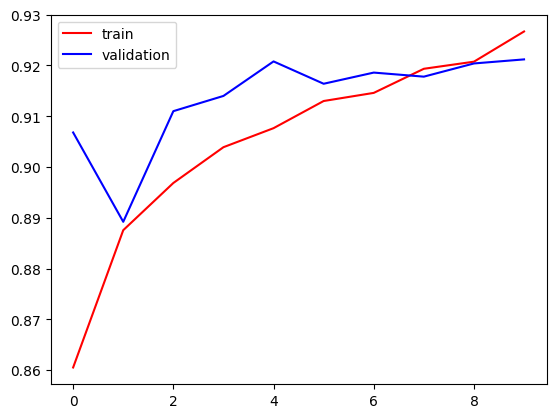

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

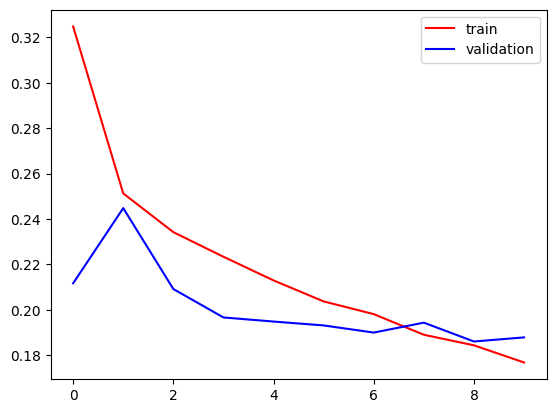

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

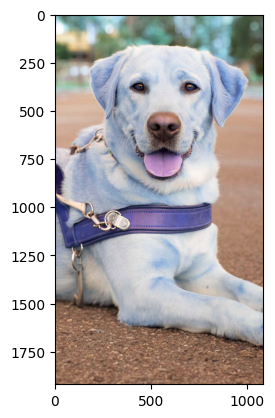

In [18]:
import cv2
test_img=cv2.imread('/content/dog.jpg')
plt.imshow(test_img)


In [28]:
test_img.shape

(150, 150, 3)

In [29]:
test_img=cv2.resize(test_img,(150,150))
test_img = test_img / 255.0  #normalize pixel values
test_input=test_img.reshape((1,150,150,3))

In [30]:
y_pred=model.predict(test_input)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[1.]], dtype=float32)

In [31]:
# Decision on basis of threshold
if y_pred[0][0] >= 0.5:
    print("Prediction: 🐶 Dog")
else:
    print("Prediction: 🐱 Cat")

Prediction: 🐶 Dog


In [26]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and resize image to match model input shape (150, 150)
img = load_img("cat.jpeg", target_size=(150, 150))
img_array = img_to_array(img)       # Convert to array
img_array = img_array / 255.0       # Normalize if your model was trained on rescaled data
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 150, 150, 3)

# Predict
y_pred = model.predict(img_array)
print(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
[[1.188048e-08]]


In [27]:
# Decision on basis of threshold
if y_pred[0][0] >= 0.5:
    print("Prediction: 🐶 Dog")
else:
    print("Prediction: 🐱 Cat")

Prediction: 🐱 Cat


In [35]:
import numpy as np
from sklearn.metrics import accuracy_score

# Step 1: Get true labels and predictions
y_true = []
y_pred = []

# Number of steps (batches) in validation set
steps = len(validation_generator)

for i in range(steps):
    images, labels = next(validation_generator)
    preds = model.predict(images)
    preds = (preds >= 0.5).astype(int).flatten()

    y_pred.extend(preds)
    y_true.extend(labels.flatten())

# Step 2: Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy (sklearn): {acc * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

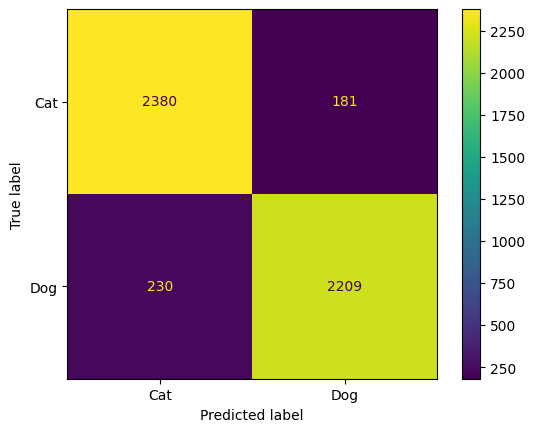

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
disp.plot()